In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

In [2]:
diab = load_diabetes()
df = pd.DataFrame(diab.data, columns=diab.feature_names)
df['target'] = diab.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


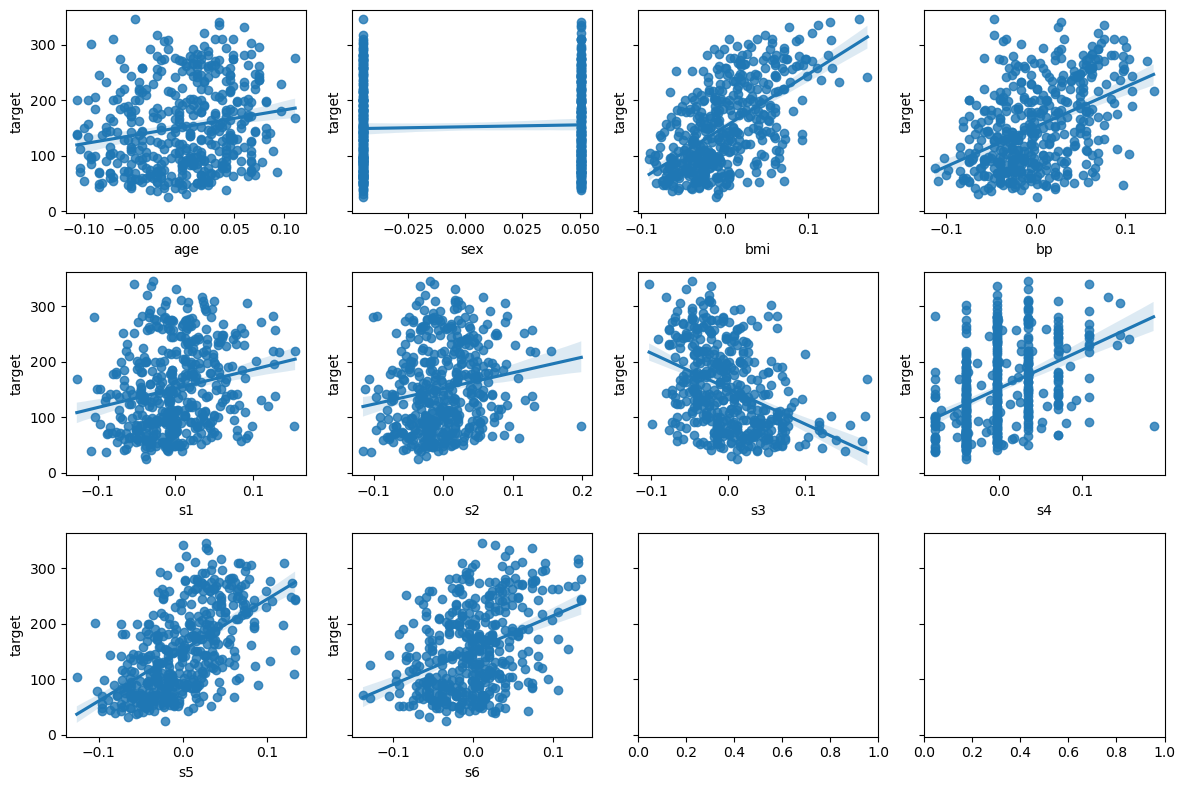

In [5]:
fig, axs = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
for i, feature in enumerate(df.columns[:-1]):
    row, col = i // 4, i % 4
    ax = axs[row, col]
    sns.regplot(data=df, x=feature, y='target', ax=ax)
plt.tight_layout()

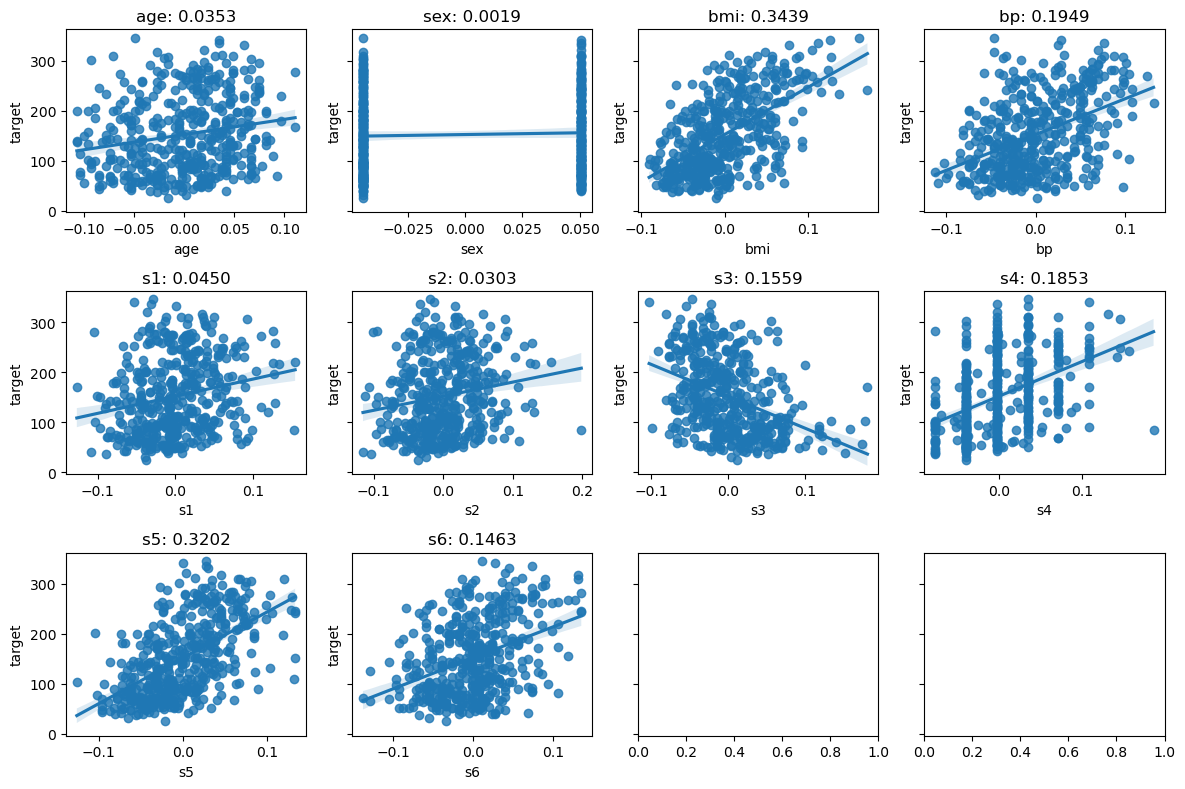

In [15]:
from sklearn.linear_model import LinearRegression
fig, axs = plt.subplots(3, 4, figsize=(12, 8), sharey=True)
for i, feature in enumerate(diab.feature_names):
    row, col = i // 4, i % 4
    ax = axs[row, col]
    sns.regplot(data=df, x=feature, y='target', ax=ax)
    lr = LinearRegression()
    lr.fit(df[feature].values.reshape(-1, 1), df['target'].values)
    score = lr.score(df[feature].values.reshape(-1, 1), df['target'].values)
    ax.set_title(f'{feature}: {score:.4f}')
plt.tight_layout()

- 다중 선형 회귀

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size=0.2, random_state=2023
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [18]:
df.iloc[:, :-1].values

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.score(X_test, y_test)

0.5011352464069887

In [22]:
lr.coef_, lr.intercept_

(array([ -51.09907508, -243.21502958,  530.16455902,  300.2157454 ,
        -777.36539516,  477.77569494,   78.09493885,  104.01312777,
         772.61888221,   82.60569756]),
 152.0810440491882)

- target = -51.09 * age + -243.21 * sex + .... + 82.60 * s6 + 152.08 
- feature : age	sex	bmi	bp	s1	s2	s3	s4	s5	s6	

In [23]:
X_test[0], y_test[0]

(array([ 0.0090156 ,  0.05068012,  0.01858372,  0.03908664,  0.01769438,
         0.01058576,  0.019187  , -0.00259226,  0.01630682, -0.01764613]),
 265.0)

In [25]:
np.dot(lr.coef_, X_test[0]) + lr.intercept_

164.5537342245901

In [28]:
y_hat = lr.predict(X_test[0].reshape(1, -1))        # reshape(1, 10)
y_hat

array([164.55373422])

In [29]:
X_test[0].reshape(1, -1)

array([[ 0.0090156 ,  0.05068012,  0.01858372,  0.03908664,  0.01769438,
         0.01058576,  0.019187  , -0.00259226,  0.01630682, -0.01764613]])

In [33]:
y_hat = lr.predict(X_test)          # 이미 2d array
for i in range(10):
    print(f'y 실제값 : {y_test[i]}, \ty 예측값 : {y_hat[i]:.2f}')

y 실제값 : 265.0, 	y 예측값 : 164.55
y 실제값 : 261.0, 	y 예측값 : 230.86
y 실제값 : 160.0, 	y 예측값 : 113.39
y 실제값 : 249.0, 	y 예측값 : 204.74
y 실제값 : 102.0, 	y 예측값 : 105.52
y 실제값 : 200.0, 	y 예측값 : 181.94
y 실제값 : 42.0, 	y 예측값 : 82.01
y 실제값 : 55.0, 	y 예측값 : 80.44
y 실제값 : 178.0, 	y 예측값 : 131.11
y 실제값 : 317.0, 	y 예측값 : 229.23


- 다른 회귀 모델

- SVR

In [34]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

In [35]:
svr = SVR()
svr.fit(X_train, y_train)
y_hat_svr = svr.predict(X_test)
r2_sv = r2_score(y_test, y_hat_svr)
mse_sv = mean_squared_error(y_test, y_hat_svr)
r2_sv

0.17032539733895213

- Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_hat_rfr = rfr.predict(X_test)
r2_rf = r2_score(y_test, y_hat_rfr)
mse_rf = mean_squared_error(y_test, y_hat_rfr)
r2_rf

0.407583211314253

- XGBoost

In [37]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_hat_xgb = xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_hat_xgb)
mse_xgb = mean_squared_error(y_test, y_hat_xgb)
r2_xgb

0.394187303430796

- Linear Regression

In [38]:
r2_lr = r2_score(y_test, y_hat)
mse_lr = mean_squared_error(y_test, y_hat)
r2_lr

0.5011352464069887

- 비교

In [41]:
print('\t\tLR\tSVM\tRF\tXGBoost')
print(f'R2 Squred\t{r2_lr:.4f}\t{r2_sv:.4f}\t{r2_rf:.4f}\t{r2_xgb:.4f}')
print(f'mse\t\t{mse_lr:.2f}\t{mse_sv:.2f}\t{mse_rf:.2f}\t{mse_xgb:.2f}')

		LR	SVM	RF	XGBoost
R2 Squred	0.5011	0.1703	0.4076	0.3942
mse		3490.25	5804.72	4144.78	4238.50


In [43]:
rf = pd.DataFrame({
    'y' : y_test, 'LR' : y_hat, 'SVM' : y_hat_svr, 'RF' : y_hat_rfr, 'XGB' : y_hat_xgb
})
rf.head(10)

,y,LR,SVM,RF,XGB
0,265.0,164.553734,143.763042,196.95,233.700012
1,261.0,230.858516,155.672919,267.50,278.177612
2,160.0,113.389079,127.947072,80.24,83.299362
3,249.0,204.741168,154.991682,152.13,163.872696
4,102.0,105.520336,130.356541,94.12,95.485413
5,200.0,181.943438,144.978071,177.49,164.095291
6,42.0,82.008070,122.085720,99.96,113.813057
7,55.0,80.442006,132.165408,134.21,140.353241
8,178.0,131.113347,132.977523,165.91,153.895767
9,317.0,229.231799,150.773680,198.45,195.394089
